In [1]:
import os 
import glob 
import numpy as np 
import pandas as pd
import statistics 
from tqdm import tqdm

from pymediainfo import MediaInfo as mi
import ffmpeg as fpeg
import ffprobe as fprobe

from matplotlib import pyplot as plt 
import seaborn as sns



### Analysis and General Checks 

In [8]:
# all collected videos
base_path = "/media/ss223464/Expansion1/Shreshth-2/Datasets/Vimeo/"
raw_vid_folders = ["10k_word_raw/", "All_Combined_keywords/"]


In [20]:
#helper function 
def get_number(s):
    try:
        return int(s.split('.')[0].split("_")[-1])
    except ValueError:
        return None


In [21]:
#listing all unique downloaded videos
raw_vids_10K = os.listdir(base_path+raw_vid_folders[0])
raw_vids_AllC = os.listdir(base_path+raw_vid_folders[1])
raw_vids_all = raw_vids_10K + raw_vids_AllC
# check the unique extensions 
exts = list(set([i.split('.')[-1] for i in raw_vids_10K]))
print("Unique extensions: ", exts)
exts = list(set([i.split('.')[-1] for i in raw_vids_AllC]))
print("Unique extensions: ", exts)
#updated list  
#raw_vids_10K = [i for i in raw_vids_10K if i.split('.')[-1] in ['webm','mp4','mkv','avi','mov','m4a',]]
#raw_vids_AllC = [i for i in raw_vids_AllC if i.split('.')[-1] == 'webm' or i.split('.')[-1] == 'mp4']

#counting total videos 
count_10K = len(raw_vids_10K)
count_AllC = len(raw_vids_AllC)
count_total_vids = count_10K + count_AllC
print("Total Video in 10K: {}; Total Video in AllC: {}; Total Video: {}.".format(count_10K, count_AllC, count_total_vids))


Unique extensions:  ['octet-stream', 'm4a', 'mov', 'mp4']
Unique extensions:  ['octet-stream', 'm4a', 'mp4', 'unknown_video', 'mov']
Total Video in 10K: 8111; Total Video in AllC: 10956; Total Video: 19067.


In [22]:
# check the unique files in total 
len(set(raw_vids_all))


11109

In [23]:
#checking primaries and video shape

#Directly count
def count_stats(address, dataset_vid):
    color_bt2020 = 0
    vertical = 0
    for i in dataset_vid:
        output = mi.parse(address+i)
        for track in output.tracks:
            if track.track_type == 'Video':
                output = track.color_primaries        
                if output == "BT.2020": 
                    color_bt2020 += 1
                widht = track.width
                height = track.height
                if widht < height: 
                    vertical += 1
    return color_bt2020, vertical

#return stats for each file
def check_stats(address, dataset_vid):
    color_primaries = {}
    shape_HxW = {}
    print("data lenght: ",len(dataset_vid))
    for i in dataset_vid:
        output = mi.parse(address+i)
        
        for track in output.tracks:
            if track.track_type == 'Video':
                output = track.color_primaries        
                # add to dictionary with address i
                color_primaries[i] = output
                width = track.width
                height = track.height
                shape_HxW[i] = [height,width]
                break
    return color_primaries, shape_HxW


In [24]:
# checking single file details: 
colors_t, HXW_t = check_stats(base_path+raw_vid_folders[1], raw_vids_AllC[:10])
print("Color Primaries: ", colors_t)
print("Shape HxW: ", HXW_t)


data lenght:  10
Color Primaries:  {'897462744_37.mp4': 'BT.2020', '897459801_56.mp4': 'BT.2020', '733740622_15.mp4': 'BT.2020', '733780620_15.mp4': 'BT.2020', '734137819_15.mp4': 'BT.2020', '733377726_15.mp4': 'BT.2020', '734767308_16.mp4': 'BT.2020', '733382610_15.mp4': 'BT.2020', '734771948_17.mp4': 'BT.2020', '733361888_15.mp4': 'BT.2020'}
Shape HxW:  {'897462744_37.mp4': [1920, 1080], '897459801_56.mp4': [1920, 1080], '733740622_15.mp4': [1080, 1920], '733780620_15.mp4': [1080, 1920], '734137819_15.mp4': [1080, 1920], '733377726_15.mp4': [1080, 1920], '734767308_16.mp4': [1080, 1920], '733382610_15.mp4': [1080, 1920], '734771948_17.mp4': [1080, 1920], '733361888_15.mp4': [1080, 1920]}


In [ ]:
# check % of video HDR; % of vertical and non-vetical video of total

#10K
color_bt2020_10K, verticals_10K = count_stats(base_path+raw_vid_folders[0], raw_vids_10K)
print("Total number of 10K videos: ", len(raw_vids_10K))
print("Total number of videos: ", len(raw_vids_10K))
print("Number and percentage of bt2020: ", color_bt2020_10K, color_bt2020_10K/len(raw_vids_10K)*100)
print("Number and percentage of vertical videos: ", verticals_10K, verticals_10K/len(raw_vids_10K)*100)



In [ ]:
# All Combined part 
color_bt2020_AllC, verticals_AllC = count_stats(base_path+raw_vid_folders[1], raw_vids_AllC)
print("Total number of AllC videos: ", len(raw_vids_AllC))
print("Total number of videos: ", len(raw_vids_AllC))
print("Number and percentage of bt2020: ", color_bt2020_AllC, color_bt2020_AllC/len(raw_vids_AllC)*100)
print("Number and percentage of vertical videos: ", verticals_AllC, verticals_AllC/len(raw_vids_AllC)*100)




Total number of AllC videos:  10956
Total number of videos:  10956
Number and percentage of bt2020:  4682 42.73457466228551
Number and percentage of vertical videos:  2618 23.895582329317268


In [ ]:
#Total percentages 
print("Number and percentage of bt2020: ", color_bt2020_AllC+color_bt2020_10K , (color_bt2020_AllC+color_bt2020_10K)/(count_AllC+count_10K) *100)
print("Number and percentage of vertical videos: ", verticals_AllC+verticals_10K , (verticals_AllC+verticals_10K)/(count_AllC+count_10K) *100)


Number and percentage of bt2020:  8383 43.96601458016468
Number and percentage of vertical videos:  4497 23.58525200608381


In [ ]:
#updated list  
#raw_vids_10K = [i for i in raw_vids_10K if i.split('.')[-1] == 'webm' or i.split('.')[-1] == 'mp4']
#raw_vids_AllC = [i for i in raw_vids_AllC if i.split('.')[-1] == 'webm' or i.split('.')[-1] == 'mp4']


In [ ]:
print(len(raw_vids_10K), len(raw_vids_AllC))

8111 10956


In [26]:
#get the array for color prim and HxW

color_prim_10K, HXW_10K = check_stats(base_path+raw_vid_folders[0], raw_vids_10K)
color_prim_AllC, HXW_AllC = check_stats(base_path+raw_vid_folders[1], raw_vids_AllC)


data lenght:  8111
data lenght:  10956


In [ ]:
# check what are other tracks in the video 
output = mi.parse(base_path+raw_vid_folders[0]+"862030165_280.mp4")
for track in output.tracks:
    if track.track_type == 'Video':
        print(track)
        

<Track track_id='1', track_type='Video'>
<Track track_id='3', track_type='Video'>


In [27]:
print(len(color_prim_10K), len(color_prim_AllC), len(color_prim_10K)+len(color_prim_AllC) )

#Total Video in 10K: 8111; Total Video in AllC: 10956; Total Video: 19067.


8107 10952 19059


KeyError: 0

In [32]:
for i in  HXW_10K.values():
    print(i)
    print(i[0])
    break


[1080, 1920]
1080


In [47]:
# Get the YT Video ID (split name with '_' and take [0]) - verify. Might be the case where actual name/ID includes '_'!
all_names = list(color_prim_10K.keys()) + list(color_prim_AllC.keys())
all_ids = ["_".join(i.split('.')[0].split("_")[:-1]) for i in all_names]

# Gettting relevant columns
base_path_ids = [base_path+raw_vid_folders[0]]*8107 + [base_path+raw_vid_folders[1]]*10952
color_prims = list(color_prim_10K.values()) + list(color_prim_AllC.values())
Heights = [i[0] for i in HXW_10K.values()] + [i[0] for i in HXW_AllC.values()]
Widths = [i[1] for i in HXW_10K.values()] + [i[1] for i in HXW_AllC.values()]
start_time = [0]*len(base_path_ids)
end_time = [get_number(i.split('.')[0].split("_")[-1]) for i in all_names]

# print and check all lengths with names in single line 
print(len(all_ids), len(all_names), len(base_path_ids), len(color_prims), len(Heights), len(Widths), len(start_time), len(end_time))

#may add more columns based on features/Info needed

# Creating dataframe to store all.
df = pd.DataFrame(
    {
        "ID":all_ids,
        "Name(+Duration)":all_names,
        "Base_Path":base_path_ids,
        "color_prims":color_prims,
        "Height":Heights,
        "Width":Widths,
        "start_time": start_time,
        "end_time": end_time
    }
)

#keep raw 
df_raw = df.copy()

#clean the dataframe 
#clean: remove all None duration videos and save them as separate csv. These are the video which i have downloaded but removed from YT. 
df_removed_shorts = df[df['Name(+Duration)'].str.contains('_None')]
df_removed_shorts.to_csv("csv_files/Analyzed_HDR_Shorts_list_vimeo_Removed.csv", index=False)
if False: 
    df_removed_shorts.to_excel("csv_files/Analyzed_HDR_Shorts_list_vimeo_Removed.xlsx", index=False)

df = df[~df['Name(+Duration)'].str.contains('_None')]
df.to_csv("csv_files/Analyzed_HDR_Shorts_list.csv")
if False:
    df.to_excel("csv_files/Analyzed_HDR_Shorts_list.xlsx", index=False)

# now check the distribution of HxW values 
df['HxW'] = df['Height'].astype(str) + "x"+df['Width'].astype(str)

# clean and drop duplicates 
df = df.drop_duplicates(subset=['ID'])
df.to_csv("csv_files/Analyzed_HDR_Shorts_list.csv")

# print the length of the dataframe
print(len(df), len(df_raw), len(df_removed_shorts))

19059 19059 19059 19059 19059 19059 19059 19059
11096 19059 0


In [52]:
# check unique HxW values in data
print("Unique HxW values: ", len(set(df['Height'].astype(str)+"x" + df['Width'].astype(str))))
# actual unique values 
print("Unique HxW values: ", set(df['Height'].astype(str) + "x"+df['Width'].astype(str)))
# now check the distribution of HxW values 
df['HxW'] = df['Height'].astype(str) + "x"+df['Width'].astype(str)
print(df['HxW'].value_counts())




Unique HxW values:  214
Unique HxW values:  {'610x990', '808x1076', '2408x4264', '842x1046', '2400x1080', '1350x1080', '614x852', '2158x2698', '1080x1808', '1334x750', '1026x1398', '460x960', '3840x2160', '1032x1916', '640x360', '2048x922', '718x1276', '960x528', '1280x712', '1080x1466', '2160x4094', '852x1426', '1182x2160', '3240x2160', '1936x3136', '1080x1600', '1440x1152', '800x1920', '1500x1050', '1080x1920', '2160x2880', '1080x1354', '2160x4096', '2540x1424', '1080x1988', '640x2128', '676x1234', '1232x720', '1830x1080', '1080x1712', '2024x2024', '540x914', '960x506', '1698x1080', '1080x1922', '720x1284', '1782x1080', '1392x1080', '1080x1678', '1692x1080', '1308x1080', '1036x1764', '2160x1728', '2160x2158', '540x960', '1078x1920', '744x960', '604x960', '938x1312', '1008x1008', '960x704', '2160x3396', '2670x2136', '1580x1080', '860x960', '1440x2006', '1962x1962', '1080x1510', '720x1280', '960x540', '1080x1512', '1026x1824', '444x960', '610x1080', '1950x1950', '2160x1392', '1620x3840

1080x1920    3021
2160x3840     789
1920x1080     329
720x1280      198
3840x2160     186
             ... 
1080x1600       1
2024x2024       1
2052x3690       1
720x956         1
4320x8192       1
Name: HxW, Length: 120, dtype: int64
Total HDR videos with more than 4 seconds duration:  4608 / 4766


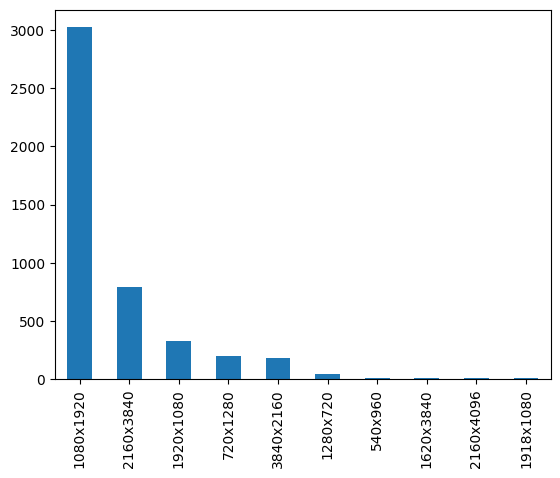

In [59]:
#filtering out the videos 
# HDR videos    
df_hdr = df[(df['color_prims']=='BT.2020') |( df['color_prims']=='bt.2020')]
#df_hdr['HxW'] = df_hdr['Height'].astype(str) + "x"+df['Width'].astype(str)
print(df_hdr['HxW'].value_counts())
# plot top 10 HxW value distribution
df_hdr['HxW'].value_counts().head(10).plot(kind='bar')

# total HDR videos with more than 4 seconds duration 
print("Total HDR videos with more than 4 seconds duration: ", len(df_hdr[df_hdr['end_time'] > 4]), "/", len(df_hdr))

df_hdr.to_csv("csv_files/True_HDR_Shorts_list.csv")
if False:
    df_hdr.to_excel("csv_files/True_HDR_Shorts_list.xlsx", index=False)

# vertical videos
df_vertical = df[df['Height'] > df['Width']]
df_vertical.to_csv("csv_files/True_Vertical_Shorts_list.csv")
if False:
    df_vertical.to_excel("csv_files/True_Vertical_Shorts_list.xlsx", index=False)

# True HDR vertical videos
df_shorts = df_hdr[df_hdr['Height'] > df_hdr['Width']]
df_shorts.to_csv("csv_files/True_HDR_Vertical_Shorts_list.csv")
if False:
    df_shorts.to_excel("csv_files/True_HDR_Vertical_Shorts_list.xlsx", index=False)

In [49]:
# making batches for true_hdr
"""
df_hdr_vertical = pd.read_csv("csv_files/True_HDR_Vertical_Shorts_list.csv")
for i in range(len(df_hdr_vertical)//500): 
    df_hdr_vertical[:(i+1)*500].to_csv("csv_files/True_HDR_Vertical_Shorts_Batch_{}.csv".format(i+1), index=False)
    if True:
        df_hdr_vertical[:(i+1)*500].to_excel("csv_files/True_HDR_Vertical_Shorts_Batch_{}.xlsx".format(i+1), index=False)
        
"""

'\ndf_hdr_vertical = pd.read_csv("csv_files/True_HDR_Vertical_Shorts_list.csv")\nfor i in range(len(df_hdr_vertical)//500): \n    df_hdr_vertical[:(i+1)*500].to_csv("csv_files/True_HDR_Vertical_Shorts_Batch_{}.csv".format(i+1), index=False)\n    if True:\n        df_hdr_vertical[:(i+1)*500].to_excel("csv_files/True_HDR_Vertical_Shorts_Batch_{}.xlsx".format(i+1), index=False)\n        \n'

In [50]:
# analyzing the average play time and estimations for total volume of data after clipping/trimming. 

# Only for True HDR Short videos

df_hdr_vertical = pd.read_csv("csv_files/True_HDR_Vertical_Shorts_list.csv")
run_times = df_hdr_vertical["end_time"].to_list()

min_runtime, max_runtime, median_runtime, avg_runtime = np.min(run_times), np.max(run_times), statistics.median(run_times), np.mean(run_times)
print("Run times for all True HDR Short Videos. Min: {}, Max: {}, Median: {}, Mean: {},".format(min_runtime, max_runtime, median_runtime, avg_runtime))

print("Original Video Count:{}".format(len(run_times)))


Run times for all True HDR Short Videos. Min: 0, Max: 3000, Median: 28.0, Mean: 74.86440677966101,
Original Video Count:590


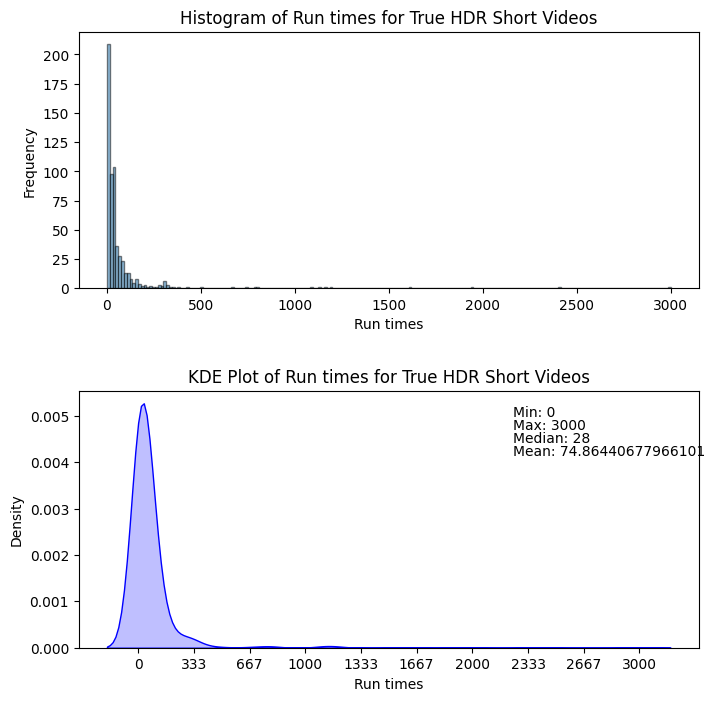

In [51]:
#plot histogram of runtime data show these statistics in the figure. 

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plotting the histogram
ax1.hist(run_times, bins=200, edgecolor='black', alpha=0.5)
ax1.set_xlabel('Run times')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Run times for True HDR Short Videos')

# Plotting the KDE plot
sns.kdeplot(run_times, ax=ax2, color='blue', fill=True)
ax2.set_xlabel('Run times')
ax2.set_ylabel('Density')
ax2.set_title('KDE Plot of Run times for True HDR Short Videos')

# Increase x-axis markings on the KDE plot
x_ticks = np.linspace(min(run_times), max(run_times), num=10)
ax2.set_xticks(x_ticks)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Adding statistics as text in the figure
plt.text(0.7, 0.9, f"Min: {min(run_times)}", transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f"Max: {max(run_times)}", transform=plt.gca().transAxes)
plt.text(0.7, 0.8, f"Median: {sorted(run_times)[len(run_times)//2]}", transform=plt.gca().transAxes)
plt.text(0.7, 0.75, f"Mean: {sum(run_times)/len(run_times)}", transform=plt.gca().transAxes)

# Display the figure
plt.show()


In [38]:
df_hdr_vertical

,Unnamed: 0,ID,Name(+Duration),Base_Path,color_prims,Height,Width,start_time,end_time
0,89,836407649,836407649_40.mp4,/media/ss223464/Expansion1/Shreshth-2/Datasets...,BT.2020,1280,720,0,40
1,259,842178414,842178414_124.mp4,/media/ss223464/Expansion1/Shreshth-2/Datasets...,BT.2020,3840,2160,0,124
2,274,832621505,832621505_82.mp4,/media/ss223464/Expansion1/Shreshth-2/Datasets...,BT.2020,3840,2160,0,82
3,290,769807872,769807872_25.mp4,/media/ss223464/Expansion1/Shreshth-2/Datasets...,BT.2020,3840,2160,0,25
4,293,746488042,746488042_39.mp4,/media/ss223464/Expansion1/Shreshth-2/Datasets...,BT.2020,1518,1080,0,39
...,...,...,...,...,...,...,...,...,...
585,17162,902651552,902651552_44.mp4,/media/ss223464/Expansion1/Shreshth-2/Datasets...,BT.2020,1920,1080,0,44
586,18064,906639390,906639390_60.mp4,/media/ss223464/Expansion1/Shreshth-2/Datasets...,BT.2020,1920,1080,0,60
587,18122,906488567,906488567_15.mp4,/media/ss223464/Expansion1/Shreshth-2/Datasets...,BT.2020,1920,1080,0,15
588,18264,907849332,907849332_57.mp4,/media/ss223464/Expansion1/Shreshth-2/Datasets...,BT.2020,1920,1080,0,57


In [63]:
#check if the video is actuall HDR

df_temp_hdr = pd.read_csv("csv_files/True_HDR_Vertical_Shorts_list.csv")
df_temp_hdr["Base_Path"][0]+df_temp_hdr["Name(+Duration)"][0]

'/media/ss223464/Expansion1/Shreshth-2/Datasets/Vimeo/10k_word_raw/754376982_13.mp4'

### Sanity check for all True HDR Shorts videos 


In [54]:
# collect all the video meta data and information 
# Simply all Key values in the csv  

import subprocess
import json 

#!mediainfo '/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/HDR_#Shorts_YT_keywords_8M_10kwords/xvi3bEmCCDs_41.webm'
    
# You can now use the 'info_dict' variable to access the information in a structured way
def get_info_dict(file_name):
        
    ''' Typical Output
    General
    Complete name                            : /media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/HDR_#Shorts_YT_keywords_8M_10kwords/xvi3bEmCCDs_41.webm
    Format                                   : WebM
    Format version                           : Version 4
    File size                                : 107 MiB
    Duration                                 : 40 s 833 ms
    Overall bit rate                         : 22.0 Mb/s
    Writing application                      : google/video-file
    Writing library                          : google/video-file

    Video
    ID                                       : 1
    Format                                   : VP9
    HDR format                               : SMPTE ST 2086, HDR10 compatible
    Codec ID                                 : V_VP9
    Duration                                 : 40 s 833 ms
    Bit rate                                 : 21.1 Mb/s
    Width                                    : 2 160 pixels
    Height                                   : 3 840 pixels
    Display aspect ratio                     : 0.562
    Frame rate mode                          : Constant
    Frame rate                               : 24.000 FPS
    Color space                              : YUV
    Bits/(Pixel*Frame)                       : 0.106
    Stream size                              : 103 MiB (96%)
    Language                                 : English
    Default                                  : Yes
    Forced                                   : No
    Color range                              : Limited
    Color primaries                          : BT.2020
    Transfer characteristics                 : HLG
    Matrix coefficients                      : BT.2020 non-constant
    Mastering display color primaries        : Display P3
    Mastering display luminance              : min: 0.0050 cd/m2, max: 1000 cd/m2
    '''

    #"mediainfo /media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/HDR_#Shorts_YT_keywords_8M_10kwords/xvi3bEmCCDs_41.webm"
    output = subprocess.check_output("mediainfo "+file_name, shell=True).decode()
    
    info_dict = {}
    current_section = None

    lines = output.split('\n')
    for line in lines:
        line = line.strip()
        if line:
            if ':' not in line:
                section = line[:]
                info_dict[section] = {}
                current_section = section
            elif ':' in line:
                key, value = line.split(':', 1)
                info_dict[current_section][key.strip()] = value.strip()

    #Remove un-necessary keys 
    """
    'Complete name' in General section
    'ID' in video section 
    'Height' in video section 
    'Width' in video section 
    """
    info_dict['General'].pop('Complete name')
    info_dict['Video'].pop('ID')
    info_dict['Video'].pop('Width')
    info_dict['Video'].pop('Height')

    return info_dict
temp_info_keys = [
        "Format"
        "Format version"
        "File size"
        "Duration"
        "Overall bit rate"
        "Writing application"
        "Writing library"
        "Format"
        "HDR format"
        "Codec ID"
        "Duration"
        "Bit rate"
        "Width"
        "Height"
        "Display aspect ratio"
        "Frame rate mode"
        "Frame rate"
        "Color space"
        "Bits/(Pixel*Frame)"
        "Stream size"
        "Language"
        "Default"
        "Forced"
        "Color range"
        "Color primaries"
        "Transfer characteristics"
        "Matrix coefficients"
        "Mastering display color primaries"
        "Mastering display luminance"
    ]
    
def update_csv_info(df_csv):
    list_info_dict = []
    for i,name in enumerate(df_csv["Name(+Duration)"].to_list()):
        file_name = df_csv["Base_Path"][i]+name
        info_dict = get_info_dict(file_name)
        #merge the "General" and "Video" sections
        list_info_dict.append({**info_dict["General"], **info_dict["Video"]})

    #Add keys as new columns in the existing dataframe.    
    for i in temp_info_keys:
        df_csv[i] = ''

    #add the values from info dict 
    for i,info_dict in enumerate(list_info_dict):
        df_csv.loc[i, list(info_dict.keys())] = list(info_dict.values())

    return df_csv


In [55]:
# For example, print the complete name and video format

#list of all csv: 

list_csv = glob.glob("csv_files/*.csv")

# check if the video is actual HDR

for i in list_csv:
    df_temp = pd.read_csv(i)

    if False:
        file_name = df_temp["Base_Path"][0]+df_temp["Name(+Duration)"][0]

        info_dict = get_info_dict(file_name)

        print(info_dict["Video"]["Format"])
        print(info_dict["Video"]["Codec ID"])

    #update csv and save
    df_temp = update_csv_info(df_temp)
    df_temp.to_csv(i)



KeyError: 'Video'

## Data Filtering and Cleaning for SDR-HDR Domain Transalation and HDR-Quality Assessment 


In [56]:
""" 
Check True HDR Video 

"""

import subprocess
import json
import os
import pandas as pd

def is_video_hdr(video_path):
    """
    Check if the video at the given path is HDR.
    
    Args:
    - video_path (str): The path to the video file.
    
    Returns:
    - bool: True if the video is HDR, False otherwise.
    """
    cmd = [
        "ffprobe", 
        "-v", "error", 
        "-show_streams",
        "-select_streams", "v:0",
        "-print_format", "json",
        video_path
    ]
    
    result = subprocess.run(cmd, capture_output=True, text=True)
    video_info = json.loads(result.stdout)

    video_stream = video_info["streams"][0]

    # Checking some common HDR indicators in the metadata
    # This can be extended based on more specific requirements
    if ("color_transfer" in video_stream and video_stream["color_transfer"] == "smpte2084") or \
       ("color_space" in video_stream and video_stream["color_space"] in ["bt2020nc", "bt2020c"]) or \
       ("bits_per_raw_sample" in video_stream and int(video_stream["bits_per_raw_sample"]) > 8):
        return True

    return False


In [5]:
"""
Read All CSV files for data. 

"""
import glob 
import pandas as pd


list_csv = glob.glob("csv_files/*.csv")
#drop if has _Batch_ in the name
list_csv = [i for i in list_csv if "_Batch_" not in i]
print("All data chunks: ", list_csv)


"""
# Converting in xlsx
for i in list_csv:
    temp_xls = pd.read_csv(i)
    if True:
        temp_xls.to_excel(i.split(".")[0]+".xlsx", index=False)
"""

All data chunks:  ['csv_files/True_Vertical_Shorts_list.csv', 'csv_files/True_HDR_Vertical_Shorts_list_+4sec.csv', 'csv_files/Analyzed_HDR_Shorts_list.csv', 'csv_files/True_HDR_Vertical_Shorts_list.csv', 'csv_files/True_HDR_Shorts_list.csv', 'csv_files/Analyzed_HDR_Shorts_list_YT_Removed.csv', 'csv_files/True_Vertical_Shorts_list_SDR_+4sec.csv']


'\n# Converting in xlsx\nfor i in list_csv:\n    temp_xls = pd.read_csv(i)\n    if True:\n        temp_xls.to_excel(i.split(".")[0]+".xlsx", index=False)\n'

In [24]:
""" 
Read all csv and check the count of videos. 

"""
for i in list_csv:
    temp_csv = pd.read_csv(i)
    print(i.split("/")[-1], len(temp_csv))

""" 
Check if removed csv has any video present other csvs.

NOTE- these are separate videos, which are (probably)removed from Youtube platform.
NOTE- No overlap between this and other csvs.
"""
df_removed = pd.read_csv("csv_files/Analyzed_HDR_Shorts_list_YT_Removed.csv")
df_removed["ID"].to_list()
for i in list_csv:
    temp_csv = pd.read_csv(i)
    print(i.split("/")[-1], len(temp_csv[temp_csv["ID"].isin(df_removed["ID"].to_list())]))



True_Vertical_Shorts_list.csv 3567
True_HDR_Vertical_Shorts_list_+4sec.csv 0
Analyzed_HDR_Shorts_list.csv 8666
True_Vertical_Shorts_list_SDR_+4sec (copy).csv 644
True_HDR_Vertical_Shorts_list.csv 2923
True_HDR_Shorts_list.csv 7784
Analyzed_HDR_Shorts_list_YT_Removed.csv 472
True_Vertical_Shorts_list_SDR_+4sec.csv 644
True_Vertical_Shorts_list.csv 0
True_HDR_Vertical_Shorts_list_+4sec.csv 0
Analyzed_HDR_Shorts_list.csv 0
True_Vertical_Shorts_list_SDR_+4sec (copy).csv 0
True_HDR_Vertical_Shorts_list.csv 0
True_HDR_Shorts_list.csv 0
Analyzed_HDR_Shorts_list_YT_Removed.csv 472
True_Vertical_Shorts_list_SDR_+4sec.csv 0


In [6]:
""" 
Dealing with just vertical shorts. 
"""

df_short = pd.read_csv("csv_files/Analyzed_HDR_Shorts_list.csv")
df_vertical = pd.read_csv("csv_files/True_Vertical_Shorts_list.csv")
df_hdr = pd.read_csv("csv_files/True_HDR_Shorts_list.csv")
df_hdr_vertical = pd.read_csv("csv_files/True_HDR_Vertical_Shorts_list.csv")

"""
# cleaning columns
see = pd.read_csv('csv_files/True_Vertical_Shorts_list.csv', index_col=False)
print(see)
see.pop('Unnamed: 0.2')
see.pop('Unnamed: 0.1')
see.pop('Unnamed: 0')
see.replace("", float("NaN"), inplace=True)
see.dropna(axis=1, how='all')
print(see.columns)
"""


# Check for HDR csv: 

#check for all. 
for i in tqdm(range(len(df_hdr))):
    sample_add = df_hdr["Base_Path"][i] + df_hdr["Name(+Duration)"][i]
    continue    
    if is_video_hdr(sample_add):
        #print(f"{sample_add} is HDR.")
        continue
    else:
        print(f"{sample_add} is not HDR.")
        continue

    if False:
        #also print all meta data of video file 
        cmd = [
            "ffprobe", 
            "-v", "error", 
            "-show_streams",
            "-select_streams", "v:0",
            "-print_format", "json",
            sample_add
        ]
        result = subprocess.run(cmd, capture_output=True, text=True)
        video_info = json.loads(result.stdout)
        print(json.dumps(video_info, indent=4))



100%|██████████| 7784/7784 [00:00<00:00, 189165.56it/s]


In [7]:
# Drop the above videos from the csv (HDR and Vertical_HDR)

drop_names = ["qrX0jzOecPc_137.webm",
              "Ffvd5lQdZVI_56.webm",
              "jx9ZBDxnmIo_201.webm"]

df_hdr = df_hdr[~df_hdr["Name(+Duration)"].isin(drop_names)]
df_hdr_vertical = df_hdr_vertical[~df_hdr_vertical["Name(+Duration)"].isin(drop_names)]

#Final Count: 
print("Total Shorts: ", len(df_short))
print("Total Vertical Shorts: ", len(df_vertical))
print("Total HDR Shorts: ", len(df_hdr))
print("Total HDR Vertical Shorts: ", len(df_hdr_vertical))


Total Shorts:  8666
Total Vertical Shorts:  3567
Total HDR Shorts:  7781
Total HDR Vertical Shorts:  2923


V_VP9    2919
av01        4
Name: Codec ID, dtype: int64
HLG    2753
PQ      170
Name: Transfer characteristics, dtype: int64
BT.2020    2923
Name: color_prims, dtype: int64
median duration 33.0
mean duration 45.11700307902839
min duration 2.0
max duration 239.0
greater than 4 sec 2907
4k or above 605
1080p or above 2709
median bitrate 5.552
mean bitrate 9.377128292849813
min bitrate 0.318
max bitrate 28.7
greater than 2  2900


Text(0.5, 1.0, 'Histogram of Bitrate for True HDR Short Videos')

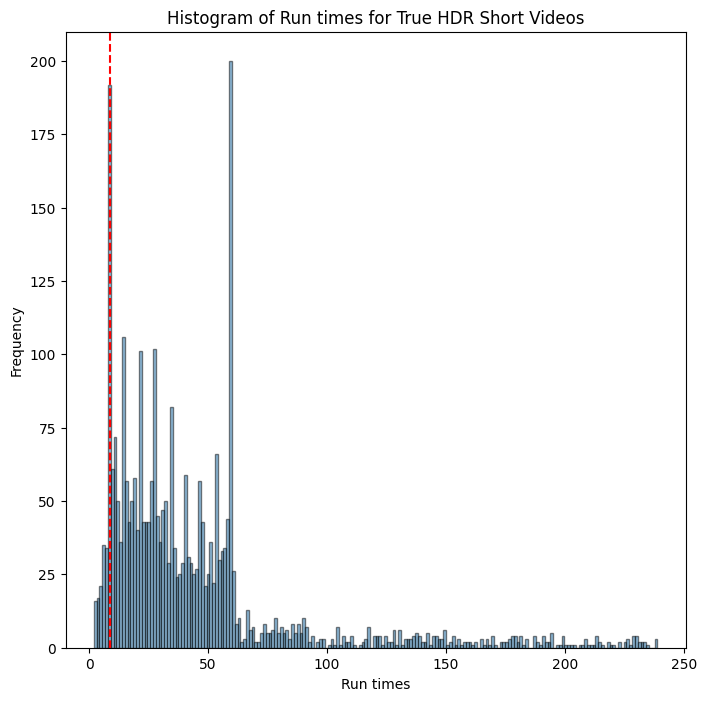

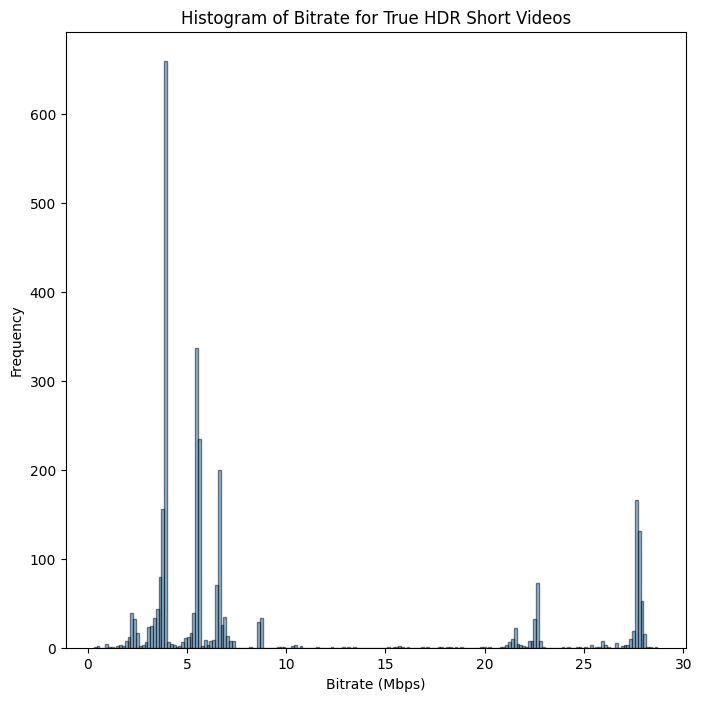

In [8]:
# Get the HDR_Vertical codec distribution and Tranfer function distribution.
print(df_hdr_vertical["Codec ID"].value_counts())
print(df_hdr_vertical["Transfer characteristics"].value_counts())
print(df_hdr_vertical["color_prims"].value_counts())

#duration distribution, mean, median, min, max, and curve 
print("median duration", df_hdr_vertical["end_time"].median())
print("mean duration", df_hdr_vertical["end_time"].mean())
print("min duration", df_hdr_vertical["end_time"].min())
print("max duration", df_hdr_vertical["end_time"].max())
#greater than 10 sec    
print("greater than 4 sec", len(df_hdr_vertical[df_hdr_vertical["end_time"]>=4]))

#check resolution, how many 4k or above and how many 1080p or below. vertical videos
print("4k or above", len(df_hdr_vertical[df_hdr_vertical["Height"]>=3840]))
print("1080p or above", len(df_hdr_vertical[df_hdr_vertical["Height"]>=1920]))

#plot histogram of runtime data show these statistics in the figure.
import numpy as np
import matplotlib.pyplot as plt

# Create subplots
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

# Plotting the histogram
ax1.hist(df_hdr_vertical["end_time"], bins=200, edgecolor='black', alpha=0.5)
ax1.set_xlabel('Run times')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Run times for True HDR Short Videos')
#marker at 9 sec
ax1.axvline(x=9, color='r', linestyle='--', label='9 sec')

#bitrate, get all in Mbps. from Mb/s and kb/s , split from kb/s and convert to float and divide by 1000, gap betweeb first digi and rest of the digits so combining them
df_hdr_vertical["Bitrate_new"] = [float("".join(i.split("k")[0].split(" ")))/1000 if "k" in i else float("".join(i.split("M")[0].split(" "))) for i in df_hdr_vertical["Bit rate"]]

#plot the bitrate distribution
print("median bitrate", df_hdr_vertical["Bitrate_new"].median())
print("mean bitrate", df_hdr_vertical["Bitrate_new"].mean())
print("min bitrate", df_hdr_vertical["Bitrate_new"].min())
print("max bitrate", df_hdr_vertical["Bitrate_new"].max())
print("greater than 2 ", len(df_hdr_vertical[df_hdr_vertical["Bitrate_new"]>=2]))

#histogram
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.hist(df_hdr_vertical["Bitrate_new"], bins=200, edgecolor='black', alpha=0.5)
ax1.set_xlabel('Bitrate (Mbps)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Bitrate for True HDR Short Videos')




In [9]:
# Apply all filters found above in HDR Vertical to get total count 
# duration >=9, bitrate >=2 
print("Total HDR Vertical Videos (>=4 sec and >=2 Mbps): ",len(df_hdr_vertical[(df_hdr_vertical["end_time"]>=4) & (df_hdr_vertical["Bitrate_new"]>=1)]))

Total HDR Vertical Videos (>=4 sec and >=2 Mbps):  2904


median frame rate 30.0
mean frame rate 38.46722921655834
min frame rate 23.048
max frame rate 60.0
greater than 30  2923


Text(0.5, 1.0, 'Histogram of Frame rate for True HDR Short Videos')

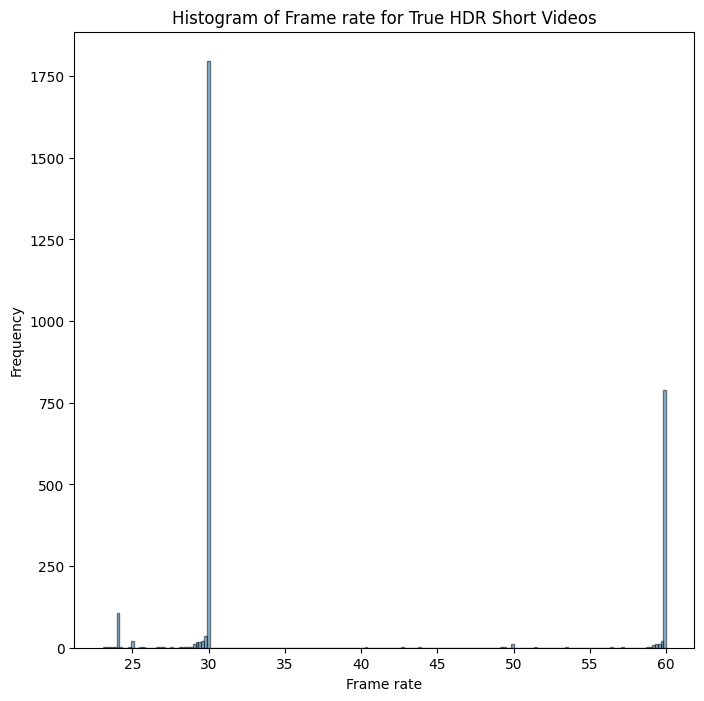

In [10]:
#chekc frame rate 
#distribution of frame rate, split " "[0] and convert to float to get distribution
df_hdr_vertical["Frame rate_new"] = [float(i.split(" ")[0]) for i in df_hdr_vertical["Frame rate"]]
print("median frame rate", df_hdr_vertical["Frame rate_new"].median())
print("mean frame rate", df_hdr_vertical["Frame rate_new"].mean())
print("min frame rate", df_hdr_vertical["Frame rate_new"].min())
print("max frame rate", df_hdr_vertical["Frame rate_new"].max())

print("greater than 30 ", len(df_hdr_vertical[df_hdr_vertical["Frame rate_new"]>=20]))

#plot the frame rate distribution
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.hist(df_hdr_vertical["Frame rate_new"], bins=200, edgecolor='black', alpha=0.5)
ax1.set_xlabel('Frame rate')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Frame rate for True HDR Short Videos')


# Downloading 4K SDR shorts videos from YT 



In [17]:
# reading the videos from downloaded folder and checking the resolution. dont use cv2 
import os 
from glob import glob 
import subprocess
import json
import warnings 
warnings.filterwarnings("ignore")


core_4k_sdr_videos = [i for i in glob("/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/SDR_#Shorts_YT_4K_All/*", recursive=True) if "webm" in i or "mp4" in i]
print("Total 4k SDR videos: ", len(core_4k_sdr_videos))

#check the resolution of all videos  (vertical)
total_vertical_4k = 0
other_resolutions = {}
for i in core_4k_sdr_videos:
    # using ffprobe 

    cmd = [
        "ffprobe", 
        "-v", "error", 
        "-show_streams",
        "-select_streams", "v:0",
        "-print_format", "json",
        i
    ]
    try: 
        result = subprocess.run(cmd, capture_output=True, text=True)
        video_info = json.loads(result.stdout)
        width = int(video_info["streams"][0]["width"])
        height = int(video_info["streams"][0]["height"])
    except:
        print("Error in: ", i)
        continue

    if height >= 3840 and width >= 2160:
        total_vertical_4k += 1
    else:
        other_resolutions[str(width)+"_"+str(height)] = other_resolutions.get(str(width)+"_"+str(height), 0) + 1

    

print("Total 4k SDR videos: ", total_vertical_4k)
print("Not 4K:", len(core_4k_sdr_videos)-total_vertical_4k)
print("Other resolutions: ", other_resolutions)



Total 4k SDR videos:  60920
Error in:  /media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/SDR_#Shorts_YT_4K_All/LrLuN7bbuW8_84.webm.ytdl
Error in:  /media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/SDR_#Shorts_YT_4K_All/LrLuN7bbuW8_84.webm.part
Error in:  /media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/SDR_#Shorts_YT_4K_All/Js-4_13dbuE_215.webm.ytdl
Error in:  /media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/SDR_#Shorts_YT_4K_All/Js-4_13dbuE_215.webm.part
Error in:  /media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/SDR_#Shorts_YT_4K_All/Bvi6WPJ5uDQ_215.webm.part
Total 4k SDR videos:  24419
Not 4K: 36501
Other resolutions:  {'3840_2160': 26109, '3840_2026': 1590, '3840_1920': 193, '3840_2080': 1, '1920_2504': 1, '3840_1600': 35, '3238_2160': 10, '3240_2160': 77, '2160_2160': 1583, '1216_2160': 186, '2160_3778': 2, '2026_3840': 1006, '2160_3744': 30, '2160_2880': 432, '2160_2938': 1, '1920_1920': 624, '2160_3140': 3, '2160_2304': 19, '2160_3812': 12, '2024

### COPY All Vertical HDR and SDR Vertical videos in a Separate folder to check manually. 

Get All the videos with duration >= 4sec. 


- Youtube: 
    - Frame rate is not tempered in HDR videos. So dont filter based on it. 
    - Bitrate matters, but since YT will give raw videos so dont filter. 
    - Duration Matters - filter with >=4 sec. 
    - Resolution matters, but I downloaded highest and YT will give raw so don't filter.
    


In [11]:
df_hdr_vertical = df_hdr_vertical[(df_hdr_vertical["end_time"]>=4)]

# Save the final csv 
df_hdr_vertical.to_csv("csv_files/True_HDR_Vertical_Shorts_list_+4sec.csv", index=False)
if False:
    df_hdr_vertical.to_excel("csv_files/True_HDR_Vertical_Shorts_list_+4sec.xlsx", index=False)
# Copy all videos in a separate folder
print(len(df_hdr_vertical))
import shutil
# reset the index 
df_hdr_vertical = df_hdr_vertical.reset_index(drop=True)

for i in tqdm(range(len(df_hdr_vertical))):
    sample_add = df_hdr_vertical["Base_Path"][i] + df_hdr_vertical["Name(+Duration)"][i]
    try:
        # copy if the video is not already present
        if not os.path.exists("/".join(df_hdr_vertical["Base_Path"][i].split('/')[0:-2])+"/HDR_#Shorts_YT_True_Vertical_HDR_4sec/"+df_hdr_vertical["Name(+Duration)"][i]):
            shutil.copy(sample_add, "/".join(df_hdr_vertical["Base_Path"][i].split('/')[0:-2])+"/HDR_#Shorts_YT_True_Vertical_HDR_4sec/")
    except:
        print("Error in copying: ", sample_add)
        continue


2907


100%|██████████| 2907/2907 [00:00<00:00, 62723.28it/s]


In [23]:
# In Saved folder "/media/ss223464/FVQA-PART1/Shreshth/HDR_#Shorts_YT_True_Vertical_HDR_4sec", separate based in resolution using df_hdr_vertical["Height"] and df_hdr_vertical dataframe 

base_hdr_4sec = "/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/HDR_#Shorts_YT_True_Vertical_HDR_4sec/" #"/media/ss223464/FVQA-PART1/Shreshth/HDR_#Shorts_YT_True_Vertical_HDR_4sec/"


# 4k or above
df_hdr_vertical_4k = df_hdr_vertical[df_hdr_vertical["Height"]>=3840]
# reset the index 
df_hdr_vertical_4k = df_hdr_vertical_4k.reset_index(drop=True)
print(len(df_hdr_vertical_4k))

#make a new folder 
os.mkdir("/".join(base_hdr_4sec.split('/')[0:-2])+"/HDR_#Shorts_YT_True_Vertical_HDR_4sec_4k/")
# move in a new folder 

for i in tqdm(range(len(df_hdr_vertical_4k))):
    sample_add =  base_hdr_4sec + df_hdr_vertical_4k["Name(+Duration)"][i]
    try:
        # copy if the video is not already present
        if not os.path.exists("/".join(base_hdr_4sec.split('/')[0:-2])+"/HDR_#Shorts_YT_True_Vertical_HDR_4sec_4k/"+df_hdr_vertical_4k["Name(+Duration)"][i]):
            shutil.copy(sample_add, "/".join(base_hdr_4sec.split('/')[0:-2])+"/HDR_#Shorts_YT_True_Vertical_HDR_4sec_4k/")
    except:
        print("Error in copying: ", sample_add)
        continue

# between 1080p and 4k
df_hdr_vertical_1080 = df_hdr_vertical[(df_hdr_vertical["Height"]>=1920) & (df_hdr_vertical["Height"]<3840)]
# reset the index
df_hdr_vertical_1080 = df_hdr_vertical_1080.reset_index(drop=True)
print(len(df_hdr_vertical_1080))
#make a new folder
os.mkdir("/".join(base_hdr_4sec.split('/')[0:-2])+"/HDR_#Shorts_YT_True_Vertical_HDR_4sec_1080/")
# move in a new folder
for i in tqdm(range(len(df_hdr_vertical_1080))):
    sample_add = base_hdr_4sec  + df_hdr_vertical_1080["Name(+Duration)"][i]
    try:
        # copy if the video is not already present
        if not os.path.exists("/".join(base_hdr_4sec.split('/')[0:-2])+"/HDR_#Shorts_YT_True_Vertical_HDR_4sec_1080/"+df_hdr_vertical_1080["Name(+Duration)"][i]):
            shutil.copy(sample_add, "/".join(base_hdr_4sec.split('/')[0:-2])+"/HDR_#Shorts_YT_True_Vertical_HDR_4sec_1080/")
    except:
        print("Error in copying: ", sample_add)
        continue

# below 1080p
df_hdr_vertical_below_1080 = df_hdr_vertical[df_hdr_vertical["Height"]<1920]
# reset the index
df_hdr_vertical_below_1080 = df_hdr_vertical_below_1080.reset_index(drop=True)
print(len(df_hdr_vertical_below_1080))
#make a new folder
os.mkdir("/".join(base_hdr_4sec.split('/')[0:-2])+"/HDR_#Shorts_YT_True_Vertical_HDR_4sec_below_1080/")
# move in a new folder
for i in tqdm(range(len(df_hdr_vertical_below_1080))):
    sample_add = base_hdr_4sec + df_hdr_vertical_below_1080["Name(+Duration)"][i]
    try:
        # copy if the video is not already present
        if not os.path.exists("/".join(base_hdr_4sec.split('/')[0:-2])+"/HDR_#Shorts_YT_True_Vertical_HDR_4sec_below_1080/"+df_hdr_vertical_below_1080["Name(+Duration)"][i]):
            shutil.copy(sample_add, "/".join(base_hdr_4sec.split('/')[0:-2])+"/HDR_#Shorts_YT_True_Vertical_HDR_4sec_below_1080/")
    except:
        print("Error in copying: ", sample_add)
        continue


2095


100%|██████████| 2095/2095 [16:57<00:00,  2.06it/s]  


208


100%|██████████| 208/208 [00:49<00:00,  4.22it/s]


In [40]:
""" 
Filtering the videos from certain channels.

Channels = ["WEALTH","Mercedes Gummi Bear Compton", "Секс-шоп Intimka", "Good Lines"]

 - Get the original search query results and compile all csv files. 
 - Get the rows which have the channels  
 - Then remove all other columns, except the ID and Channels 
 
 - Get the HDR vertical dataframe and check how many video are there. 
 - Check the video which are 1080p or higher and have duration >=4 sec and have ID overlapping with the channel videos 
"""


import glob
import pandas as pd

# Get the Channel Names
Channels = ["MDS YT"]

""" 
Get the original Search queries; Reading the search query results and compiling all csv files. 
"""

list_csv = glob.glob("/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/CSV_CC_HDR_under4_#shorts/*.csv")
print("All data chunks: ", list_csv)

# Read all csv and combine them 
df_search = pd.DataFrame()
for i in list_csv:
    df_temp = pd.read_csv(i)
    df_search = pd.concat([df_search, df_temp], axis=0)

# reset index 
df_search = df_search.reset_index(drop=True)

# fill NaN with None in channel column 
df_search["channel"] = df_search["channel"].fillna("None")

# Get the channel name, replace NaN
df_search["Channel_Name"] = [i.split('{')[1].split("'")[3] if i != "None" else None for i in df_search["channel"].to_list()]

# channel has jason in string, read the channel name, structure in inside double quotes, so split by double quotes and take the 2nd element 
df_search.head(5)

# Description of channel names 
print(df_search["Channel_Name"].describe())


""" 
Filtering query results with Channel names.
"""
# Get the rows which have the channels 
df_search_channels = df_search[df_search["Channel_Name"].isin(Channels)]
df_search_channels = df_search_channels.reset_index(drop=True)
print("Total videos from the channel (in total): ", len(df_search_channels))
df_search_channels.head(5)


""" 
Filtering the CSV/Video based on the channel names.
"""
# Get the csv for videos of interests. - HDR Vertical 
csv_interest = "csv_files/True_HDR_Vertical_Shorts_list_+4sec.csv"
df_hdr_vertical = pd.read_csv(csv_interest)
df_hdr_vertical = df_hdr_vertical.reset_index(drop=True)

# ID overlapping with the channel videos
# Add channel column and map the channel name to the ID if present else None 
df_hdr_vertical["Channel_Name"] = df_hdr_vertical["ID"].map(dict(zip(df_search_channels["id"].to_list(), df_search_channels["Channel_Name"].to_list())))
# drop index columns 
df_hdr_vertical = df_hdr_vertical.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2"])
df_hdr_vertical.head(5)

# Get the all/certain channels videos
df_hdr_vertical_channels = df_hdr_vertical[df_hdr_vertical["Channel_Name"].isin(Channels)]
df_hdr_vertical_channels = df_hdr_vertical_channels.reset_index(drop=True)
print("Total videos from the channel (In HDR Vertical Filtered): ", len(df_hdr_vertical_channels))

# check the resolution distribution
print(df_hdr_vertical_channels["Height"].value_counts())

# Video in 4K or above group 
print('4k or above videos: ',len(df_hdr_vertical_channels[df_hdr_vertical_channels["Height"]>=3840]))
# Video in 1080p to 4K.
print('1080p to 4K videos: ',len(df_hdr_vertical_channels[(df_hdr_vertical_channels["Height"]>=1920) & (df_hdr_vertical_channels["Height"]<3840)]))
# Video in below 1080p.
print('Below 1080p videos: ',len(df_hdr_vertical_channels[df_hdr_vertical_channels["Height"]<1920]))


if False: 
    # Check videos in each corresponding separated folder and move to a new folder with channel name 
    import shutil
    import os
    import glob
    from tqdm import tqdm

    # Get the base path
    base_hdr_4sec4k = "/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/Filtered/HDR_#Shorts_YT_True_Vertical_HDR_4sec_4k/"
    base_hdr_4sec1080 = "/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/HDR_#Shorts_YT_True_Vertical_HDR_4sec_1080/"
    base_hdr_4secbelow1080 = "/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/Filtered/HDR_#Shorts_YT_True_Vertical_HDR_4sec_below_1080/"
    base_hdr_removed = "/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/Filtered/HDR_#Shorts_YT_Vertical_HDR_4sec_Removed/"

    # move all videos belonging to Channels from above folder and new folder, webm or mp4. Do it in for loop for all channels.
    all_vids_4sec = glob.glob(base_hdr_4sec4k+"*")+glob.glob(base_hdr_4sec1080+"*")+glob.glob(base_hdr_4secbelow1080+"*")+glob.glob(base_hdr_removed+"*")
    for i in Channels:
        # Get the channel videos from the above folders
        list_videos = df_hdr_vertical_channels[df_hdr_vertical_channels["Channel_Name"]==i]["Name(+Duration)"].to_list()
        
        print(f"Total videos from the {i} (In HDR Vertical Filtered): ", len(list_videos))
        # make a new folder 
        save_channel = "/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/Filtered/HDR_#Shorts_YT_Vertical_HDR_4sec_Removed/"+i+"/"
        try:
            os.mkdir(save_channel)
        except: 
            print("Folder already present: ", i)
        # move in a new folder 
        for j in tqdm(list_videos):
            #get the address of j video 
            j_path = [k for k in all_vids_4sec if j in k]
            #if j is empty, show name 
            if len(j_path)==0 or len(j_path)>=2:
                print("Video not found: ", j, j_path)
                continue

            try:
                # copy if the video is not already present
                if not os.path.exists(save_channel+j.split("/")[-1]):
                    shutil.move(j_path[0], save_channel)
            except:
                print("Error in copying: ", j)
                continue


All data chunks:  ['/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/CSV_CC_HDR_under4_#shorts/CC_HDR_under4_video_#shorts_10k_wordlist.csv', '/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/CSV_CC_HDR_under4_#shorts/CC_HDR_under4_video_#shorts_10k_wordlist_8m_entities.csv', '/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/CSV_CC_HDR_under4_#shorts/CC_HDR_under4_video_#shorts_urbandict-2dot5M.csv', '/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/CSV_CC_HDR_under4_#shorts/HDR_CC_under4_video_#shorts_YT_8m_entities.csv']
count     13170
unique     3358
top       かぜのねこ
freq        644
Name: Channel_Name, dtype: object
Total videos from the channel (in total):  2
Total videos from the channel (In HDR Vertical Filtered):  1
1920    1
Name: Height, dtype: int64
4k or above videos:  0
1080p to 4K videos:  1
Below 1080p videos:  0


In [ ]:
""" 
Looking for channel name with id : 57ZKhNG7HSk 
"""

search_id = '57ZKhNG7HSk'
# Get the channel name for given id
print(f"channel name for {search_id}", df_search[df_search["id"]==search_id]["Channel_Name"].to_list())


In [42]:
# Getting all vertical SDR videos 
df_vertical_sdr = df_vertical[~df_vertical["Name(+Duration)"].isin(df_hdr_vertical["Name(+Duration)"].to_list())] 
print(f"original length: {len(df_vertical_sdr)}")
# filter >4 sec. 
df_vertical_sdr = df_vertical_sdr[df_vertical_sdr["end_time"]>=4]
print(f"filtered length: {len(df_vertical_sdr)}")

# Save the fina csv and copy all to new folder for manual filtering 
df_vertical_sdr.to_csv("csv_files/True_Vertical_Shorts_list_SDR_+4sec.csv", index=False)

import shutil 

# reset the index
df_vertical_sdr = df_vertical_sdr.reset_index(drop=True)

for i in tqdm(range(len(df_vertical_sdr))):
    sample_add = df_vertical_sdr["Base_Path"][i] + df_vertical_sdr["Name(+Duration)"][i]
    try:
        shutil.copy(sample_add, "/".join(df_vertical_sdr["Base_Path"][i].split('/')[0:-2])+"/#Shorts_YT_True_Vertical_SDR_4sec/")
    except:
        print("Error in copying: ", sample_add)
        continue


original length: 660
filtered length: 644


'\n# Save the fina csv and copy all to new folder for manual filtering \ndf_vertical_sdr.to_csv("csv_files/True_Vertical_Shorts_list_SDR_+4sec.csv", index=False)\n\nimport shutil \n\n# reset the index\ndf_vertical_sdr = df_vertical_sdr.reset_index(drop=True)\n\nfor i in tqdm(range(len(df_vertical_sdr))):\n    sample_add = df_vertical_sdr["Base_Path"][i] + df_vertical_sdr["Name(+Duration)"][i]\n    try:\n        shutil.copy(sample_add, "/".join(df_vertical_sdr["Base_Path"][i].split(\'/\')[0:-2])+"/#Shorts_YT_True_Vertical_SDR_4sec/")\n    except:\n        print("Error in copying: ", sample_add)\n        continue\n'

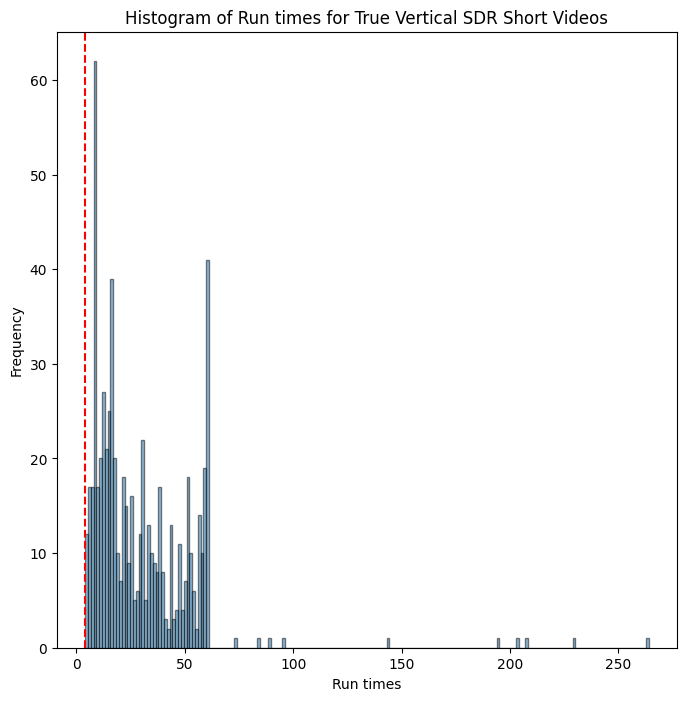

In [43]:
# check end time distribution for vertical SDR videos

#plot histogram of runtime data show these statistics in the figure.
import numpy as np
import matplotlib.pyplot as plt

# Create subplots
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

# Plotting the histogram
ax1.hist(df_vertical_sdr["end_time"], bins=200, edgecolor='black', alpha=0.5)
ax1.set_xlabel('Run times')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Run times for True Vertical SDR Short Videos')
#marker at 4 sec
ax1.axvline(x=4, color='r', linestyle='--', label='4 sec')




In [12]:
# check resolution of SDR  
print("4k or above", len(df_vertical_sdr[df_vertical_sdr["Height"]>=3840]))
print("1080p or above", len(df_vertical_sdr[df_vertical_sdr["Height"]>=1920]))

#longer than  16:9


4k or above 137
1080p or above 307


In [49]:

 # check how many of videos in folder correlates with resolutions in csv. 

filtered_sdr = "/media/ss223464/FVQA-PART1/Shreshth/#Shorts_YT_True_Vertical_SDR_4sec/" 
all_files = os.listdir(filtered_sdr)
print("Total files in folder: ", len(all_files))

# take on video and check if it is present in csv.
filtered_vertical_sdr = df_vertical_sdr[df_vertical_sdr["Name(+Duration)"].isin(all_files)]
print("Total files in csv: ", len(filtered_vertical_sdr))

# originally resolution in sdr vertical csv 
print("Originally 4k or above : ", len(df_vertical_sdr[df_vertical_sdr["Height"]>=3840]))
print("Originally 1080p or above : ", len(df_vertical_sdr[df_vertical_sdr["Height"]>=1920]))

# Check the resolution now 
print("filtered 4k or above : ", len(filtered_vertical_sdr[filtered_vertical_sdr["Height"]>=3840]))
print("fitlered 1080p or above : ", len(filtered_vertical_sdr[filtered_vertical_sdr["Height"]>=1920]))


Total files in folder:  135
Total files in csv:  135
Originally 4k or above :  137
Originally 1080p or above :  307
filtered 4k or above :  113
fitlered 1080p or above :  116
Overlapping 4k or above :  113
Overlapping 1080p or above :  116


/tmp/ipykernel_1081757/4232102318.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Overlapping 4k or above : ", len(filtered_vertical_sdr[filtered_vertical_sdr["Height"]>=3840][filtered_vertical_sdr["Height"]>=3840].drop_duplicates()))
/tmp/ipykernel_1081757/4232102318.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Overlapping 1080p or above : ", len(filtered_vertical_sdr[filtered_vertical_sdr["Height"]>=1920][filtered_vertical_sdr["Height"]>=1920].drop_duplicates()))


## Manually cleaned the Vertical Videos (>4 sec). 

- Manually checked and removed a lot of videos for SDR and some for HDR vertical videos with >=4 sec. 

- Out of approx 3000 (check above for exact number)
    - SDR [644]: 
        - 509 videos were rejected, mostly due to licence issues. Some due to content issue.  
        - 135 videos were kept as clean and CC. 
        - overall SDR videos/content is very varying and difficult. A lot of issue in CC licence as people change content, copy it, and an add filters. 
    - HDR [2907]:
        - Divided into three groups based on resolution: 4K, FHD-4K, below FHD. 
        - Majority of videos ~ 2000 were FHD, 600 4K, rest below FHD but still high resolution. 
        - Apparently, not a lot of issue except for some controversial or uncomforting content. Almost no issue with CC licence. 
        - Remove approx - 100ish videos. 


In [10]:
# Reading the filtered video list for vertical and updating the csv and saving new for dataset. 
# update the dataset folder as well. - Make copy for final cleaned dataset. 

import pandas as pd 
import os 

# read the sdr/hdr csv
df_vertical_sdr_4sec = pd.read_csv("csv_files/True_Vertical_Shorts_list_SDR_+4sec.csv")
df_vertical_sdr_4sec = df_vertical_sdr_4sec.reset_index(drop=True)
print("Total SDR videos in csv: ", len(df_vertical_sdr_4sec))

df_vertical_hdr_4sec = pd.read_csv("csv_files/True_HDR_Vertical_Shorts_list_+4sec.csv")
df_vertical_hdr_4sec = df_vertical_hdr_4sec.reset_index(drop=True)
print("Total HDR videos in csv: ", len(df_vertical_hdr_4sec))

# Get the cleaned folder path
cleaned_sdr_4sec = os.listdir("/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/Filtered/#Shorts_YT_True_Vertical_SDR_4sec/")
cleaned_hdr_4sec = os.listdir("/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/Filtered/HDR_#Shorts_YT_True_Vertical_HDR_4sec_4k/")+os.listdir("/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/Filtered/HDR_#Shorts_YT_True_Vertical_HDR_4sec_1080/")+os.listdir("/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/Filtered/HDR_#Shorts_YT_True_Vertical_HDR_4sec_below_1080/")

# Get the cleaned csv
df_cleaned_sdr_4sec = df_vertical_sdr_4sec[df_vertical_sdr_4sec["Name(+Duration)"].isin(cleaned_sdr_4sec)]
df_cleaned_hdr_4sec = df_vertical_hdr_4sec[df_vertical_hdr_4sec["Name(+Duration)"].isin(cleaned_hdr_4sec)]

# drop all indexed
df_cleaned_sdr_4sec = df_cleaned_sdr_4sec.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2"])
df_cleaned_hdr_4sec = df_cleaned_hdr_4sec.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2"])

# if whole column is NaN then drop it 
df_cleaned_sdr_4sec = df_cleaned_sdr_4sec.dropna(axis=1, how='all')
df_cleaned_hdr_4sec = df_cleaned_hdr_4sec.dropna(axis=1, how='all')

# Save the final csv
df_cleaned_sdr_4sec.to_csv("csv_files/True_Vertical_Shorts_list_SDR_+4sec_cleaned.csv", index=False)
df_cleaned_hdr_4sec.to_csv("csv_files/True_Vertical_Shorts_list_HDR_+4sec_cleaned.csv", index=False)

# Print the final count 
print("Total SDR Vertical Videos Cleaned (>=4 sec): ",len(df_cleaned_sdr_4sec))
print("Total HDR Vertical Videos Cleaned (>=4 sec): ",len(df_cleaned_hdr_4sec))


Total SDR videos in csv:  644
Total HDR videos in csv:  2907
Total SDR Vertical Videos Cleaned (>=4 sec):  135
Total HDR Vertical Videos Cleaned (>=4 sec):  2660


In [12]:
# Save with just IDs 
df_cleaned_sdr_4sec["ID"].to_csv("csv_files/True_Vertical_Shorts_list_SDR_+4sec_cleaned_ID.csv", index=False)
df_cleaned_hdr_4sec["ID"].to_csv("csv_files/True_Vertical_Shorts_list_HDR_+4sec_cleaned_ID.csv", index=False)

In [15]:
# list the videos in YT show in removed hdr folder
print(os.listdir('/media/ss223464/Expansion/Shreshth_LIVE/Datasets/YT-HDR/Filtered/HDR_#Shorts_YT_Vertical_HDR_4sec_Removed/Show_YT/'))

['4pkRKch3H5E_88.webm', '4xjbhmTe5zw_42.webm', '5OyOiKDsGo4_58.webm']


## Checking and Analysing the Cleaned Video 

* Note that more cleaning is being done at YT end - redundant videos, videos with minors, etc.


In [2]:
# Read the cleaned HDR vertical csv 

import pandas as pd 

df_hdr = pd.read_csv("csv_files/True_Vertical_Shorts_list_HDR_+4sec_cleaned.csv")
df_hdr = df_hdr.reset_index(drop=True)

# check the resolution distribution in 4k,2k,1080p,720p,480p,360p,240p,144p  
print(df_hdr["Height"].value_counts())

# Video in 4K or above group
print('4k or above videos: ',len(df_hdr[df_hdr["Height"]>=3840]))

# Video in 1080p to 4K.
print('1080p to 4K videos: ',len(df_hdr[(df_hdr["Height"]>=1920) & (df_hdr["Height"]<3840)]))

# Video in between 1080p and 720p.
print('1080p to 720p videos: ',len(df_hdr[(df_hdr["Height"]>=1280) & (df_hdr["Height"]<1920)]))

# Video in between 720p and 480p.
print('720p to 480p videos: ',len(df_hdr[(df_hdr["Height"]>=854) & (df_hdr["Height"]<1280)]))

# Video in between 480p and 360p.
print('480p to 360p videos: ',len(df_hdr[(df_hdr["Height"]>=640) & (df_hdr["Height"]<854)]))

# Video in between 360p and 240p.
print('360p to 240p videos: ',len(df_hdr[(df_hdr["Height"]>=426) & (df_hdr["Height"]<640)]))

# Video in between 240p and 144p.
print('240p to 144p videos: ',len(df_hdr[(df_hdr["Height"]>=256) & (df_hdr["Height"]<426)]))




1920    1765
3840     595
2160     119
1280      88
1278      10
        ... 
1080       1
1176       1
1800       1
1256       1
1638       1
Name: Height, Length: 72, dtype: int64
4k or above videos:  595
1080p to 4K videos:  1914
1080p to 720p videos:  113
720p to 480p videos:  33
480p to 360p videos:  3
360p to 240p videos:  2
240p to 144p videos:  0
